https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [23]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../data/sales/shampoo.csv')

In [105]:
r = pd.read_csv('tcc.csv')

In [106]:
r.head()

,RyanHhttp://char.iis.sinica.edu.tw/,big5,scipt_en,script_ch,file
0,大,a46a,oracle,甲骨文,acs/a46a/a46a-oracle_000.gif
1,小,a470,oracle,甲骨文,acs/a470/a470-oracle_000.gif
2,一,a440,jinwen,金文,acs/a440/a440-jinwen_000.gif
3,一,a440,jinwen,金文,acs/a440/a440-jinwen_001.gif
4,一,a440,jinwen,金文,acs/a440/a440-jinwen_002.gif


In [81]:
r.columns = ['RyanHhttp://char.iis.sinica.edu.tw/', 'big5', 'id', 'scipt_en', 'script_ch', 'file']

In [83]:
del r['id']

In [100]:
r.to_csv('tcc.csv',index=False)

In [65]:
c.columns = ['id','scipt_en','script_ch','file','nan']

In [68]:
del c['nan']

In [72]:
c.to_csv('tcc.csv')

In [66]:
c.rename_axis(['RyanHhttp://char.iis.sinica.edu.tw/','big5'])

id scipt_en script_ch  \
RyanHhttp://char.iis.sinica.edu.tw/ big5                            
大                                   a46a    43   oracle       甲骨文   
小                                   a470    49   oracle       甲骨文   
一                                   a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
                                    a440     1   jinwen        金文   
千                                   a464    37    chuxi      楚系文字   
                                    a464    37    chuxi      楚系文字   
                                    a464    37    chuxi      楚系文字   
                                    a464    37    chuxi      楚系文字   
                                    a464    37    chuxi      楚系文字   
                                    a464    37    chuxi      楚系文字   
大                                   a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
                                    a46a    43   jinwen        金文   
...                                        ...      ...       ...   
黃                                   b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  2921    chuxi      楚系文字   
                                    b6c0  

In [33]:
c.loc[-1] = ['45', 'Dean', 'male']

ValueError: cannot set a row with mismatched columns

In [28]:
c.columns = ['index','RyanHfromhttp://char.iis.sinica.edu.tw/', 'big5', 'script_en',
       'script_ch', 'file']

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [24]:
pd.to_datetime(series.Month)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

  Month  Sales of shampoo over a three year period
0  1-01                                      266.0
1  1-02                                      145.9
2  1-03                                      183.1
3  1-04                                      119.3
4  1-05                                      180.3


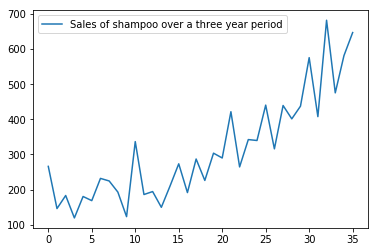

In [8]:
print(series.head())
series.plot()
pyplot.show()